In [1]:
durham_purple = "#68246d90"
library(MASS)

In [2]:
library(fields)
library(coda)
library(ggplot2)

Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.6-0 (2020-12-14) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 



# Introduction

> Marks are indicated in square brackets. The data file `myscores.txt` is available in the same directory as this notebook file, and can therefore be read in using only the filename. 

# The Problem

> We wish to analyse some data that records the numbers of plants of a particular species that survive infection with a particular disease. The data was collected from $N$ different labs, with each lab having grown a different number of plants and then having infected them with the disease. More precisely, the data takes the form $\{(y_{i}, n_{i})\}_{i\in [1..N]}$, where $n_{i}\in\mathbb{N}$ is the number of plants grown by lab $i$, and $y_{i}\in\mathbb{N}$ is the number of plants that survived the disease in lab $i$. We will denote $\{y_{i}\}$ by $y$ and $\{n_{i}\}$ by $n$.

# Question 1

Read in the data from file 'myscores.txt'. [2]

## Answer

In [3]:
scores <- read.table("myscores.txt", sep = " ")

> The following command should show the first six rows, starting with $(21, 26)$, $(15, 16)$.

In [4]:
head(scores)

,y,n
,<int>,<int>
1,21,26
2,15,16
3,12,12
4,15,17
5,11,18
6,14,15


> In order to allow for variations between labs, we model each lab $i$ as having an innate 'survival' factor, represented by a number $\theta_{i}\in\mathbb{R}$. If we know $\theta_{i}$, whether a given plant survives is independent of whether other plants do so, and, in the absence of further information, by symmetry, we can take the probability of survival given $\theta_{i}$ to be the same for all plants in lab $i$. Without loss of generality, we can therefore take $\theta_{i}\in [0, 1]$ to be the probability that any given plant in lab $i$ survives. We will denote $\{\theta_{i}\}$ by $\theta$. The probability $P(y \mid \theta, n)$ therefore takes the form:
$$
P(y \mid \theta, n) = \prod_{i = 1}^{N} P(y_{i} \mid \theta_{i}, n_{i})
$$

# Question 2

Show that the probability $P(y_{i} \mid \theta_{i}, n_{i})$ is binomial. [6]

## Answer

In any given lab, "i", we have "$n_{i}$" plants, with the chance of any individual plant surviving in lab "i" given by "$\theta_{i}$". "$y_{i}$" is the total number of plants which survive in lab "i". Assume we have the $n_{i}$ plants laid out on a table in lab "i" and we infect them one by one, the chance that the first plant survives is given by $\theta_{i}$, the chance that the second plant does not survive is given by $(1-\theta_{i})$, and so on. If $y_{i}$ plants survive, the probability of this happening y times is $\theta_{i}^{y_{i}}$, this means that $n_{i}-y_{i}$ plants must have died, with the probability of this being given by $(1-\theta_{i})^{n_{i}-y_{i}}$. However these plants are ambiguous and this configuration is arbitrary, so there is likewise $n_{i} \choose y_{i}$ different ways of any "y_{i}" plants surviving. Thus the total probability of y plants survivng is given by this product:
$$ 
P(y_{i} \mid \theta_{i}, n_{i}) = \binom{n_{i}}{y_{i}}\: \theta_{i}^{y_{i}} \: (1-\theta_{i})^{n_{i}-y_{i}}
$$
As an example of this: imagine n_{i} = 5, and y_{i} = 3, i.e. there are 5 plants in lab "i" and any 3 survive the infection. Any 3 can survive in $ 5 \choose 3 $ ways. With "S" indicating survival and "D" indicating death, these are:
<br>
SSSDD, SSDDS, SDDSS, DDSSS, SSDSD, SDSSD, DSSSD, DSSDS, SDSDS, DSDSS
<br>
So there are 10 different ways that any 3 plants can survive out of a lab of 5, and each of these ways has a $ \theta_{i}^{y_{i}} \times (1-\theta_{i})^{n_{i}-y_{i}} $ chance of occuring.

# Question 3

Derive the maximum likelihood estimate $\hat{\theta}_{i}$ of $\theta_{i}$. [4]

Compute the $\hat{\theta}$ and plot their histogram. [2]

## Answer

$$
P(y \mid \theta, n) = \prod_{i = 1}^{N} P(y_{i} \mid \theta_{i}, n_{i})
\\
Ln[P] = \sum^{N}_{i=1} Ln[P(y_{i} \mid \theta_{i}, n_{i})] = \sum^{N}_{i=1} Ln[\binom{n_{i}}{y_{i}}\: \theta_{i}^{y} \: (1-\theta_{i})^{n_{i}-y_{i}}] = \sum^{N}_{i=1} \left[ Ln[\frac{n_{i}!}{y_{i}!(n_{i}-y_{i})!}] + y_{i}Ln[\theta_{i}] + (n_{i}-y_{i})Ln[1-\theta_{i}] \right] = L
\\
\frac{\partial L}{\partial \theta_{i}} = \frac{y_i}{\theta_{i}} - \frac{n_{i}-y_{i}}{1-\theta_{i}}
\\
\frac{y_{i}}{\hat\theta_{i}} = \frac{n_{i}-y_{i}}{1-\hat\theta_{i}} \Rightarrow \hat\theta_{i} = \frac{y_{i}}{n_{i}}
$$
<br>
So for lab "i", $\theta_{i}$ in set {$\theta$} is given by the number of plants which survived in lab "i", divided by the total number of plants in lab "i".

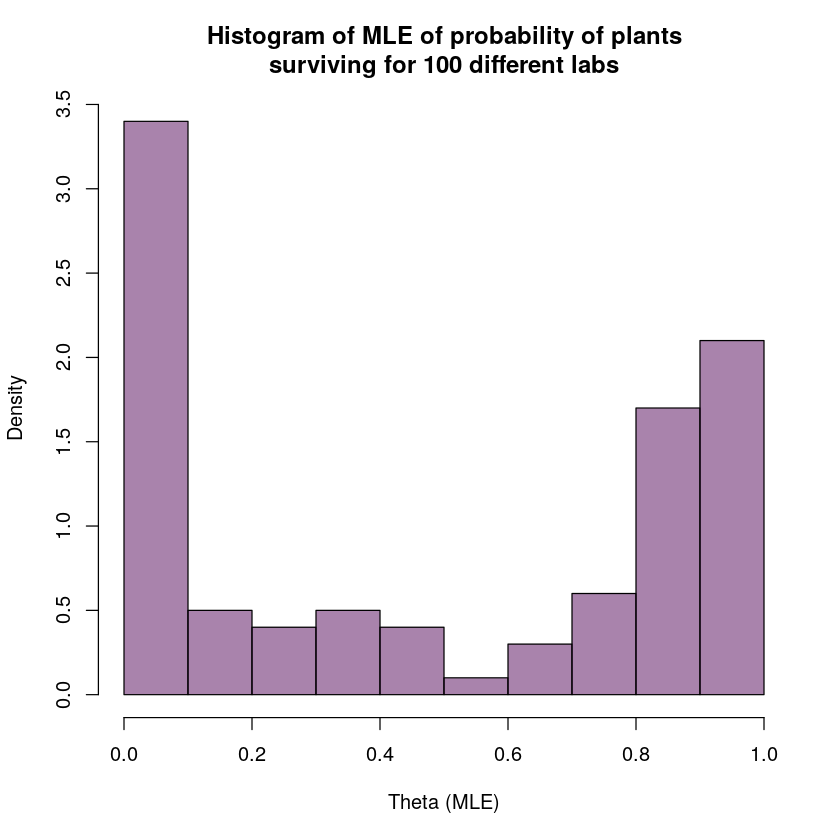

In [5]:
theta_mle <- function(y, n){
    rows <- NROW(n)
    thetas <- matrix(0, rows, 1)
    for(i in 1:rows){
        thetas[i] <- y[i] / n[i]
    }
    return(thetas)
}

thetas <- c(theta_mle(scores$y, scores$n))

hist(
    thetas,
    breaks = 10,
    xlab = "Theta (MLE)",
    main = "Histogram of MLE of probability of plants\nsurviving for 100 different labs",
    col = durham_purple,
    prob = TRUE
)

> We suppose that given knowledge of two parameters, $a$ and $b$, the values of the $\theta_{i}$ are independent, and our knowledge of each of them can be represented by a Beta probability distribution ($B(a, b)$ is the Beta function):
$$
\begin{aligned}
P(\theta \mid a, b) & = \prod_{i} P(\theta_{i} \mid a, b) \\
P(\theta_{i} \mid a, b) & = d\theta\:  {\theta_{i}^{a - 1}(1 - \theta_{i})^{b-1} \over B(a, b)} \\
\end{aligned}
$$ 

# Question 4

Show that the distribution $P(\theta \mid y, n, a, b)$ is a product over $i$ of Beta distributions for each $\theta_{i}$, and derive their parameters. [6]

Therefore explain why is the beta distribution a convenient choice for $P(\theta_{i} \mid a, b)$. [3]

## Answer 

$$
P(\theta \mid y, n, a, b) = \frac{P(y, n, a, b \mid \theta) \cdot P(\theta)}{P(y, n, a, b)} = \frac{P(y, n \mid \theta) \cdot P(a, b \mid \theta) \cdot P(\theta)}{P(y, n) \cdot P(a, b)}
\\
\\
P(a, b \mid \theta) = \frac{P(\theta \mid a, b) \cdot P(a, b)}{P(\theta)}
\\
\\
\therefore P(\theta \mid y, n, a, b) = P(\theta \mid a, b) \frac{P(y, n \mid \theta)}{P(y, n)}
\\
\\
\frac{P(y, n \mid \theta)}{P(y, n)} = \frac{P(y, n \mid \theta)}{P(\theta, n)} = P(y \mid \theta, n)
\\
\\
\therefore P(\theta \mid y, n, a, b) = P(\theta \mid a, b) \cdot P(y \mid \theta, n) = \prod_{i=1}^{N} P(\theta_{i} \mid a, b) \cdot \prod_{i = 1}^{N} P(y_{i} \mid \theta_{i}, n_{i}) = \prod_{i = 1}^{N} d\theta \binom{n_{i}}{y_{i}} {\theta_{i}^{a - 1 + y_{i}}(1 - \theta_{i})^{b - 1 + (n_{i} - y_{i})} \over B(a, b)}
\\
\therefore \alpha_{i} = a + y_{i} \text{  and  } \beta_{i} = b+n_{i}-y_{i}
$$

Given a binomial distribution which gives the probability of $y$ given $\theta$ and $n$, the beta distribution is the conjugate prior. This means you can think of the likelihood of $\theta$ in the binomial distribution as being randomly chosen from a beta distribution. The beta distribution is very flexible, being able to take many different shapes depending on the probability density of $\theta$ and the values selected for a and b.

> Suppose that our knowledge of $a$ and $b$ in the absence of any data is described by a distribution $P(a, b) = da\: db\: \pi(a, b)$.

# Question 5

Show that the distribution $P(a, b \mid y, n)$ takes the following form. [10]
$$
P(a, b \mid y, n)  \propto P(a, b) \prod_{i} {B(a + y_{i}, b + n_{i} - y_{i}) \over B(a, b)}  
$$

## Answer 

$$
P(a, b \mid y, n)  \propto P(a, b) \frac{P(y,n \mid a,b)}{P(y,n)} \propto P(a, b) \cdot \frac{P(n,a,b \mid y) \cdot P(y)}{P(y,n) \cdot P(a,b)} \propto P(a,b) \frac{P(y \mid n,a,b) \cdot P(n,a,b)}{P(y,n,a,b)} \propto P(a,b) \cdot P(y \mid n,a,b)
\\
\\
P(y \mid n,a,b) = \prod_{i} \int_{\theta} P(y_{i} \mid \theta_{i}) \cdot P(\theta_{i} \mid a,b) = \prod_{i} \int_{0}^{1} P(y_{i} \mid \theta_{i}) \cdot \pi(\theta_{i} \mid a, b) d\theta
\\
\\
\prod_{i} \int_{0}^{1} \binom{n_{i}}{y_{i}}\: \theta_{i}^{y_{i}} \: (1-\theta_{i})^{n_{i}-y_{i}} {\theta_{i}^{a - 1}(1 - \theta_{i})^{b-1} \over B(a, b)} d\theta = \prod_{i} \binom{n_{i}}{y_{i}} \frac{1}{B(a,b)} \int_{0}^{1} \theta_{i}^{y_{i}+a-1} (1-\theta_{i})^{n_{i}-y_{i}+b-1} d\theta = \prod_{i} \binom{n_{i}}{y_{i}} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)}
\\
\\
\therefore P(a, b \mid y, n) \propto P(a,b) \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)}
$$

> Now we need to define a prior $P(a, b)$. There are many ways to do this. We will choose the very simple, improper prior with $\pi(a, b)$ constant.

# Question 6

Write an R function to evaluate the logarithm of the density with respect to $da\: db$ of $P(a, b)$ (up to an overall additive constant). [2]

## Answer 

In [6]:
labPrior = function(a, b){
    k <- 1
    return(log(k))
}

# Question 7

Write an R function to evaluate the logarithm of the density with respect to $da\: db$ of $P(a, b \mid y, n)$ (up to a overall additive constant), using `scores` as default data. [10]

## Answer 

In [7]:
log_P <- function(a, b){
    
    ### Taking log of Q5 result gives: ln(k) + sum[ lbeta(𝑦𝑖 + 𝑎, 𝑛𝑖 − 𝑦𝑖 + 𝑏) - lbeta(𝑎,𝑏) ] ###
    
    rows <- nrow(scores)  # get number of rows
    log_dens <- labPrior(a, b)  # Initialise log_dens with value of prior
    
    for(i in 1:rows){  # Iterate over each row and compute lbeta(..., ...) - lbeta(a,b), then add it to running total
        log_dens = log_dens + (lbeta(scores[i,1] + a, (scores[i,2] - scores[i,1]) + b) - lbeta(a,b))
    }
    
    return(log_dens)  # Return the result
}

# Question 8

Compute the value of the logarithm of the density (with respect to $da\: db$) of $P(a, b \mid \{y_{i}\}, \{n_{i}\})$ on a rectangular grid of $(a, b)$ values over appropriate ranges. [3]

Make contour and image plots of these values and of the corresponding probability densities (up to a multiplicative constant). [3]

Use the probability densities to compute the expectations and standard deviations of $a$ and $b$ under $P(a, b \mid \{y_{i}\}, \{n_{i}\})$. [4]

## Answer 

In [8]:
nvals <- 50
a_list <- seq(0.32, 0.44, length.out = nvals)
b_list <- seq(0.36, 0.5, length.out = nvals)

data <- matrix(0, length(a_list), length(b_list))

a_counter <- 0
for(a in a_list){
    a_counter <- a_counter + 1
    b_counter <- 0
    for(b in b_list){
        b_counter <- b_counter + 1
        data[a_counter,b_counter] <- log_P(a, b)
    }
}

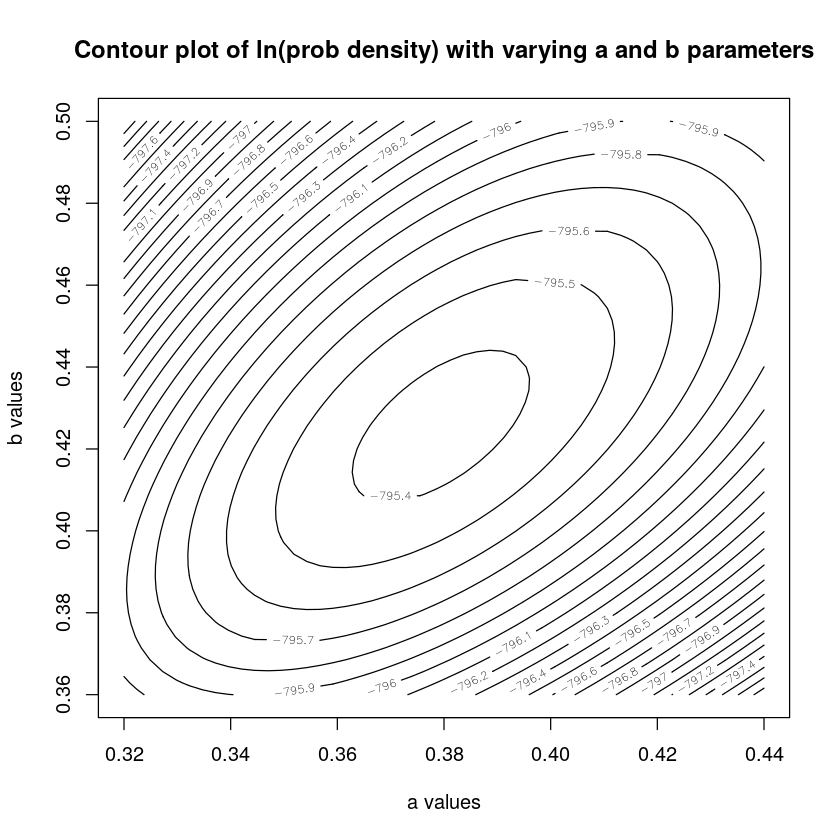

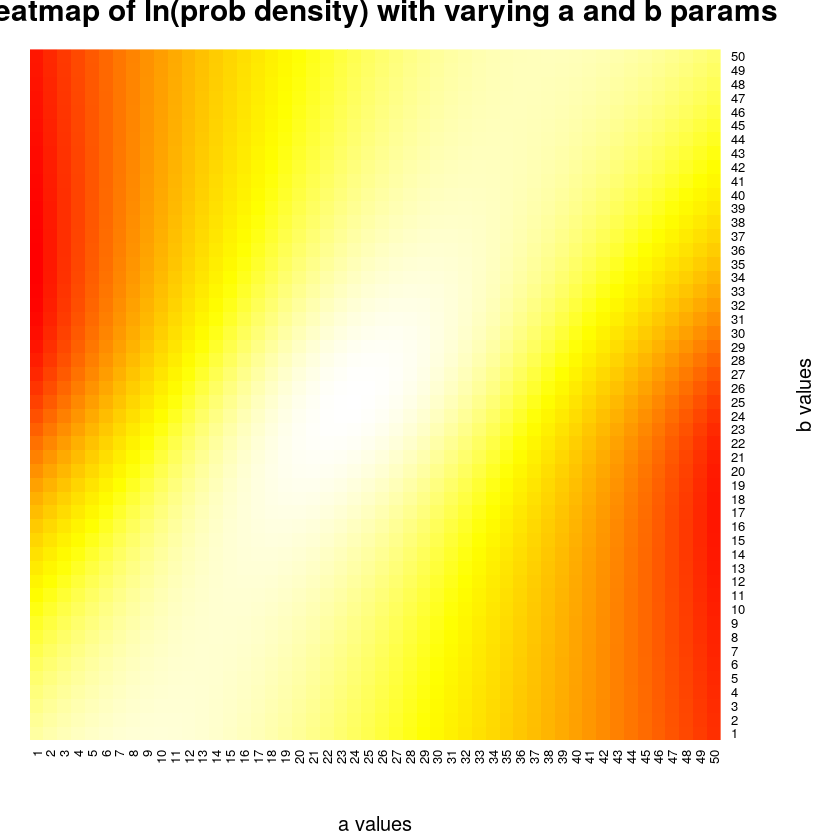

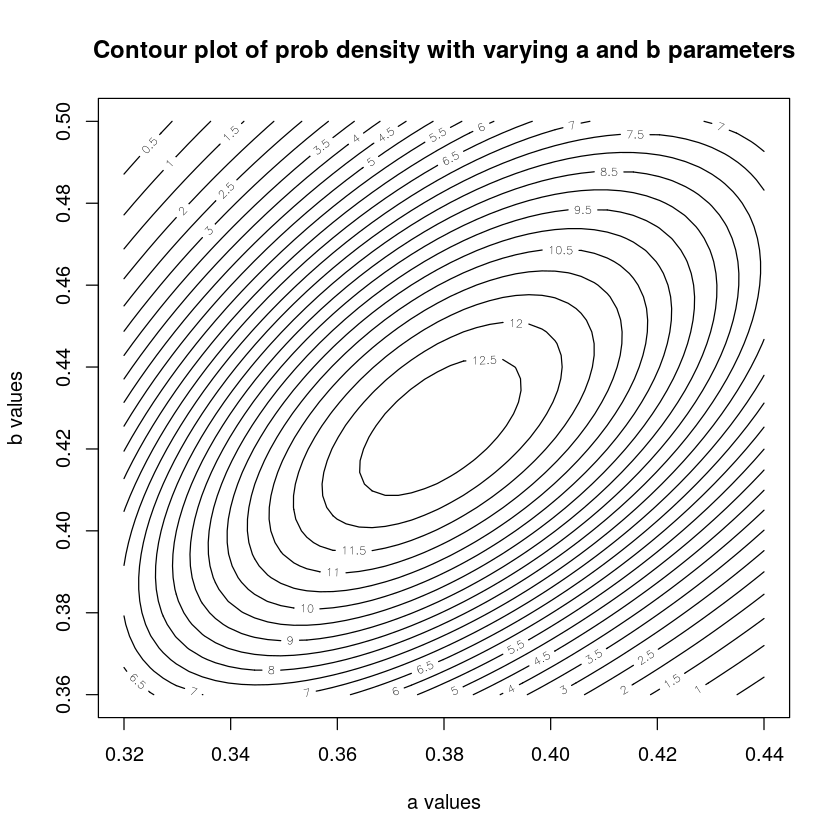

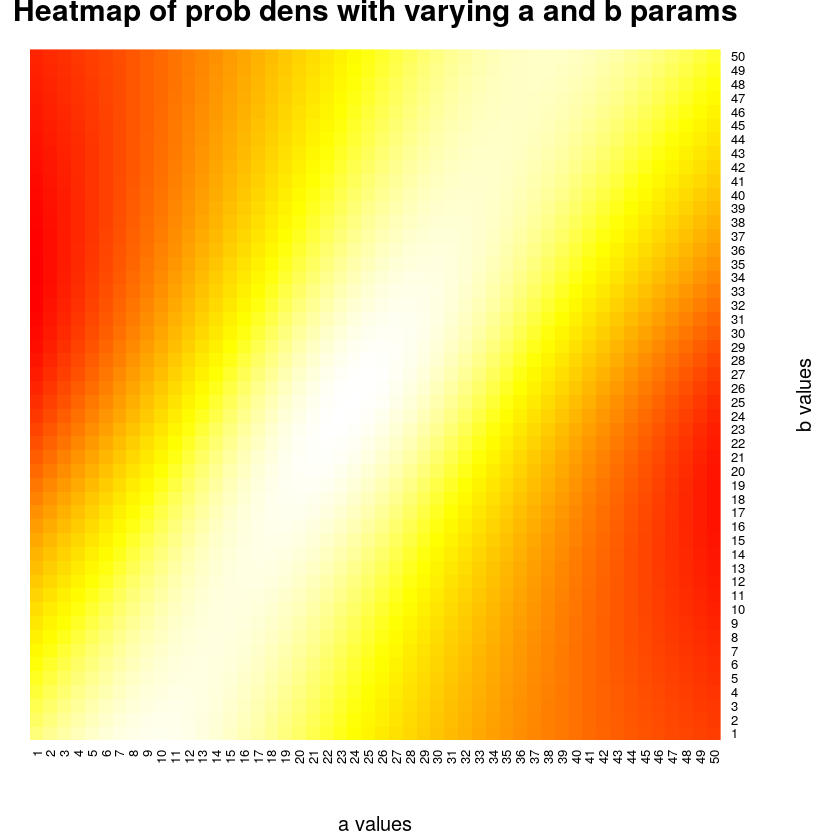

In [9]:
contour(  # Contour plot of ln(P)
    x = a_list, y = b_list, z = data,  # x, y and z values
    xlab = "a values", ylab = "b values", main = "Contour plot of ln(prob density) with varying a and b parameters",  # Plot labels
    nlevels = 20  # Number of contour lines
)

heatmap(  # Heat map of ln(P)
    data,
    Rowv = NA, Colv = NA,  # Don't show dendrograms
    col = heat.colors(nvals**2),  # Use heat pack colours with res equal to number of data points
    xlab = "a values", ylab = "b values", main = "Heatmap of ln(prob density) with varying a and b params"
)

# Transform the data so exp can be taken
shifted_data <- data - min(data)  # Minus min of data so most negative value is added, therefore minimum will be 0
shifted_prob_dens <- exp(shifted_data) - 1  # Exponentiate then minus 1 so minimum prob density is 0

contour(  # Contour plot of prob dens
    x = a_list, y = b_list, z = shifted_prob_dens,  # x, y and z values
    xlab = "a values", ylab = "b values", main = "Contour plot of prob density with varying a and b parameters",  # Plot labels
    nlevels = 20  # Number of contour lines
)

heatmap(  # Heat map of prob dens
    shifted_prob_dens,
    Rowv = NA, Colv = NA,  # Don't show dendrograms
    col = heat.colors(nvals**2),  # Use heat pack colours with res equal to number of data points
    xlab = "a values", ylab = "b values", main = "Heatmap of prob dens with varying a and b params"
)

In [10]:
log_P2 <- function(par){
    
    a <- par[1]
    b <- par[2]
    
    rows <- nrow(scores)  # get number of rows
    log_dens <- labPrior(a, b)  # Initialise log_dens with value of prior
    
    for(i in 1:rows){  # Iterate over each row and compute lbeta(..., ...) - lbeta(a,b), then add it to running total
        log_dens = log_dens + (lbeta(scores[i,1] + a, (scores[i,2] - scores[i,1]) + b) - lbeta(a,b))
    }
    
    return(log_dens)  # Return the result
}

mle <- optim(
    c(0.395, 0.5),
    log_P2,
    control=list(fnscale = -1),
    hessian=TRUE
)

cov <- solve(-mle$hessian)

E_a <- mle$par[1]
E_a_stddev <- cov[1,1]**(1/2)

E_b <- mle$par[2]
E_b_stddev <- cov[2,2]**(1/2)

E_a
E_a_stddev
E_b
E_b_stddev

[1] 0.379073

[1] 0.06057157

[1] 0.4253896

[1] 0.06756554

# Question 9

Write down the distributions $P(a \mid b, y, n)$ and $P(b \mid a, y, n)$ up to multiplicative constants. [2] 

Write R functions to perform Gibbs sampling to generate samples of $a$ and $b$. Hint: you may want to use a Metropolis-Hastings step to sample from the above conditionals. [10]

Generate 5,000 samples of $(a, b)$ and plot traces of the samples and of their autocorrelation. [4]

Compute estimates of the expectations and standard deviations of $a$ and $b$ using the samples. [4]

Compute the effective sample sizes, the Monte-Carlo standard errors of the mean estimates, and the acceptance rates. [4]

What are appropriate choices for the number of burn-in iterations and the thinning factor? Justify your answers. [4]

## Answer 

$
P(a \mid b, y, n) = \frac{P(a, b \mid y, n)}{P(b)} \propto \frac{P(a,b) \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)}}{P(b)} \propto P(a) \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)} \propto da \cdot k_{a} \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)}
\\
P(b \mid a, y, n) = \frac{P(a, b \mid y, n)}{P(a)} \propto \frac{P(a,b) \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)}}{P(a)} \propto P(b) \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)} \propto da \cdot k_{b} \cdot \prod_{i} \frac{B(y_{i}+a, n_{i}-y_{i}+b)}{B(a,b)}
$

In [11]:
# Use metropolis-hastings step as described in Murphy
# ALPHA EXPONENTIATED THEN ALGORITHM CARRIED OUT AS NORMAL

aStep <- function(oldA, oldB){
    
    newA <- rnorm(1, oldA, E_a_stddev) # Pull a newA value from norm distribution of oldA
    
    alpha <- exp(log_P(newA, oldB) - log_P(oldA, oldB))  # Prior is constant, more likely is less negative
        
    if(alpha < 1){
        r <- alpha
    } else{
        r <- 1
    }
    
    u <- runif(1, 0, 1)  # u will be between 0 and -inf

    if(u<r){
        return(newA)
    } else{
        return(oldA)
    }
}

bStep <- function(oldA, oldB){
    
    newB <- rnorm(1, oldB, E_b_stddev) # Pull a newA value from norm distribution of oldA
    
    alpha <- exp(log_P(oldA, newB) - log_P(oldA, oldB))  # Prior is constant, more likely is less negative
        
    if(alpha < 1){
        r <- alpha
    } else{
        r <- 1
    }
    
    u <- runif(1, 0, 1)  # u will be between 0 and -inf

    if(u<r){
        return(newB)
    } else {
        return(oldB)
    }
}

In [12]:
# Use metropolis-hastings step as described in Murphy
# ALL CARRIED OUT IN LOG

aStep <- function(oldA, oldB){
    
    newA <- rnorm(1, oldA, E_a_stddev) # Pull a newA value from norm distribution of oldA
    
    alpha <- log_P(newA, oldB) - log_P(oldA, oldB)  # Prior is constant, more likely is less negative, closer
                                                    # to 0 --> alpha is positive 
    u <- log(runif(1, 0, 1))  # u will be between 0 and -inf
    
    if(alpha < u){  # alpha is less than u if it loses the gamble, more likely to lose gamble if newA makes alpha
        return(oldA)  # strongly negative.
    } else{  # else means either alpha > 0, as u is always less than 0 and thus newA improves prob, or 
        return(newA)  # alpha has won the gamble against u - more likely if alpha is only slight negative
    }
}

bStep <- function(oldA, oldB){
    
    newB <- rnorm(1, oldB, E_b_stddev) # Get random number
    
    alpha <- log_P(oldA, newB) - log_P(oldA, oldB)  # Prior is constant, more likely is less negative, closer
                                                    # to 0 --> alpha is positive 
    u <- log(runif(1, 0, 1))  # u will be between 0 and -inf
    
    if(alpha < u){
        return(oldB)
    } else{  # else means either alpha > 0, as u is always less than 0 and thus newA improves prob, or 
        return(newB)
    }
}

In [13]:
gibbs <- function(N, initA, initB){
    
    acceptsA <- 0
    acceptsB <- 0
    As <- vector(length = N)
    Bs <- vector(length = N)
  
    # Set initial values
    As[1] <- initA  # First sample is our initial guess
    Bs[1] <- initB
  
    # Gibbs sampling
    for (i in 1:N) {
        newA = aStep(As[i], Bs[i]) # REPLACE WITH A STEP, returns sample of A based on previous sample of B
        As[i+1] <- newA
        if(newA != As[i]){acceptsA <- acceptsA+1}
        
        newB = bStep(As[i+1], Bs[i]) # REPLACE WITH B STEP
        Bs[i+1] <- newB
        if(newB != Bs[i]){acceptsB <- acceptsB+1}
    }
    
    result = vector(mode = "list")
    result$acceptrate <- rbind(acceptsA/N, acceptsB/N)
    result$samples <- rbind(As, Bs)
    return(result)
}

In [14]:
set.seed(3)

# Generate 5000 samples
gb <- gibbs(5000, E_a, E_b)  # Use initial starts as expected values calculated above to eliminate need for burn in

In [15]:
burn_thin <- function(samples, burn_in, thin){
    
    samples <- samples[, -c(1:burn_in)] # remove first "burn-in" number of columns
    
    if(thin == 0){
        return(samples)
    } else {
        cols <- ncol(samples)
        n <- cols - (thin * cols)
        idx <- sort(runif(n, 0, cols))
        samples_thinned <- samples[, idx]
        return(samples_thinned)
    }
}

In [16]:
vals <- function(samples, burn_in=0, thinning=0, acc_rate=gb$acceptrate){

    samples <- burn_thin(samples, burn_in=burn_in, thin=thinning)
    
    # Assign samples to As and Bs, removing burn-in
    As <- samples[1,]
    Bs <- samples[2,]
    
    # Initialise vectors to store values
    param <- vector(length = 2)
    means <- vector(length = 2)
    stddevs <- vector(length = 2)
    eff_samp_size <- vector(length = 2)
    mcmc_std_err <- vector(length = 2)
    acceptance_rate <- vector(length=2)
    
    # Calculate values for a
    param[1] <- "a"
    means[1] <- mean(As)
    stddevs[1] <- sd(As)
    eff_samp_size[1] <- effectiveSize(As)
    mcmc_std_err[1] <- stddevs[1] / eff_samp_size[1]
    acceptance_rate[1] <- acc_rate[1]
    
    # Calculate values for a
    param[2] <- "b"
    means[2] <- mean(Bs)
    stddevs[2] <- sd(Bs)
    eff_samp_size[2] <- effectiveSize(Bs)
    mcmc_std_err[2] <- stddevs[2] / eff_samp_size[2]
    acceptance_rate[2] <- acc_rate[2]
    
    return(cbind(param, means, stddevs, eff_samp_size, mcmc_std_err, acceptance_rate))
}

results <- vals(gb$samples, burn_in=0, thinning=0)
results

param,means,stddevs,eff_samp_size,mcmc_std_err,acceptance_rate
a,0.392529351716823,0.0608589822337262,388.824958046546,0.000156520256671489,0.6558
b,0.442429586333971,0.0679174779460422,460.011127986352,0.00014764311951179,0.655


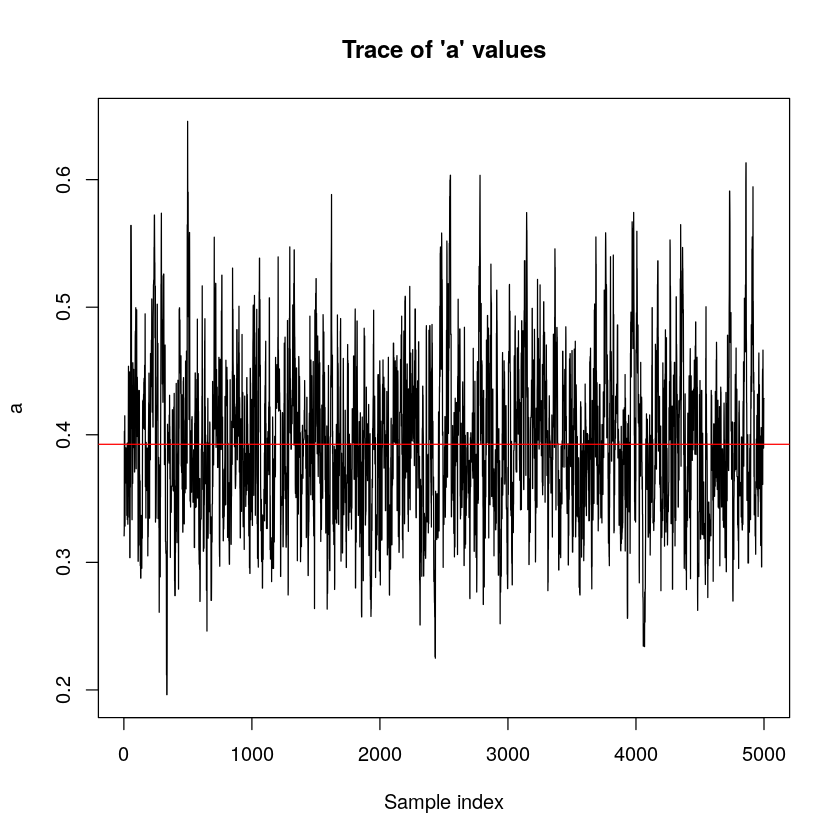

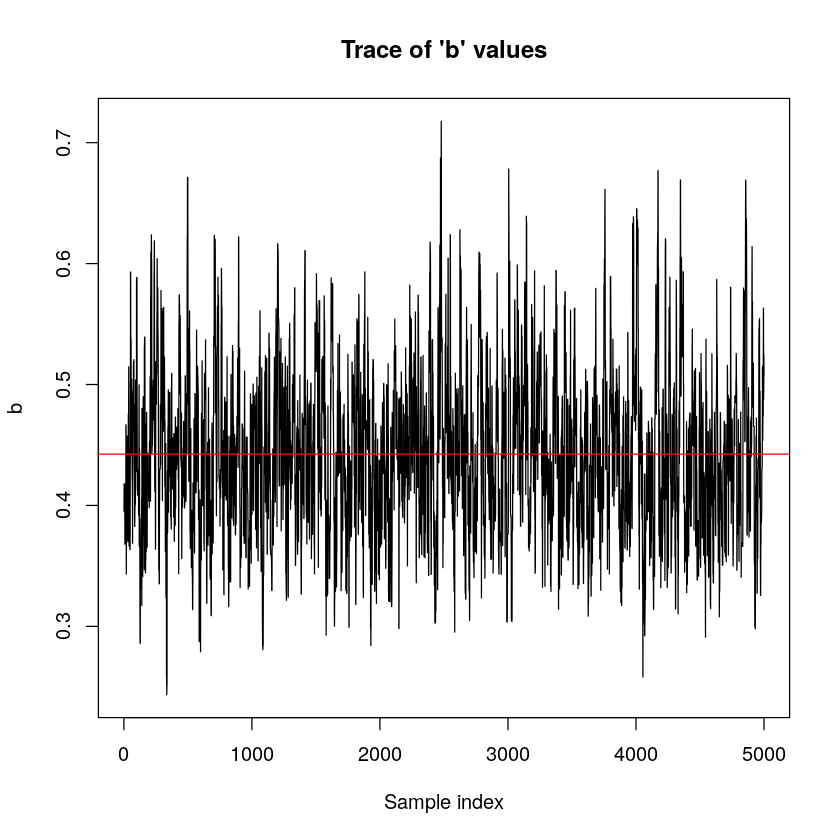

In [17]:
# Plot traces of the samples
plot_samples <- function(samples, burn_in=0, thinning=0){
    
    means <- vals(samples, burn_in=burn_in, thin=thinning)[,2]
    samples <- burn_thin(samples, burn_in=burn_in, thin=thinning)
    
    # Assign samples to As and Bs, removing burn-in
    As <- samples[1,]
    Bs <- samples[2,]
    
    # Plot As and Bs traces
    plot(As, type="l", main="Trace of 'a' values", xlab="Sample index", ylab="a")
    lines(abline(h=means[1], col = "red"))  # Add mean line
    plot(Bs, type="l", main="Trace of 'b' values", xlab="Sample index", ylab="b")
    lines(abline(h=means[2], col = "red"))  # Add mean line
}

plot_samples(gb$samples, burn_in=0, thinning=0)

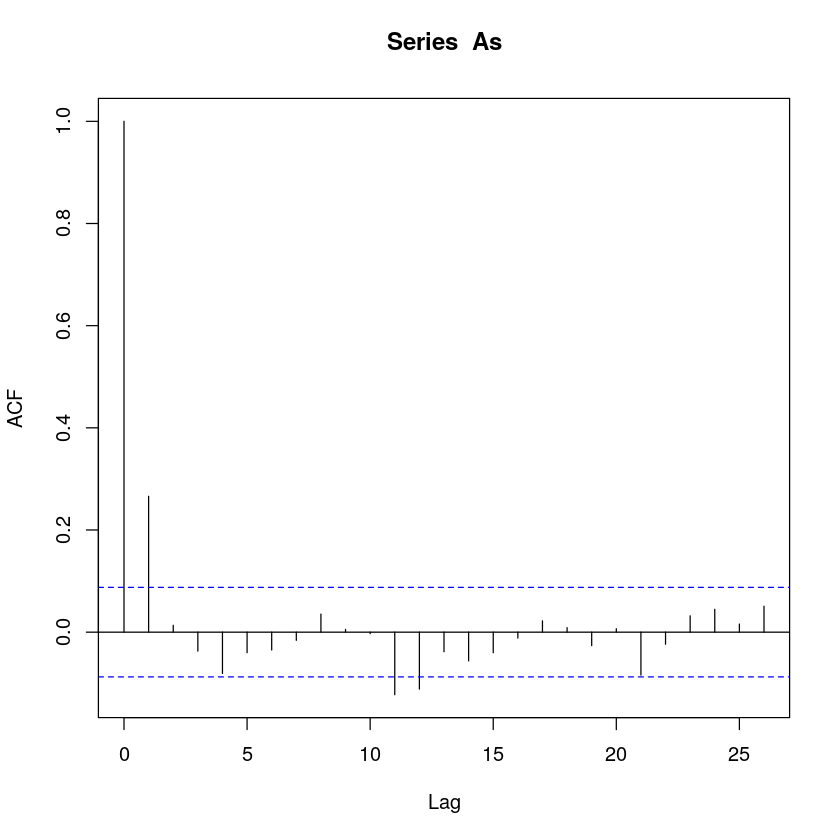

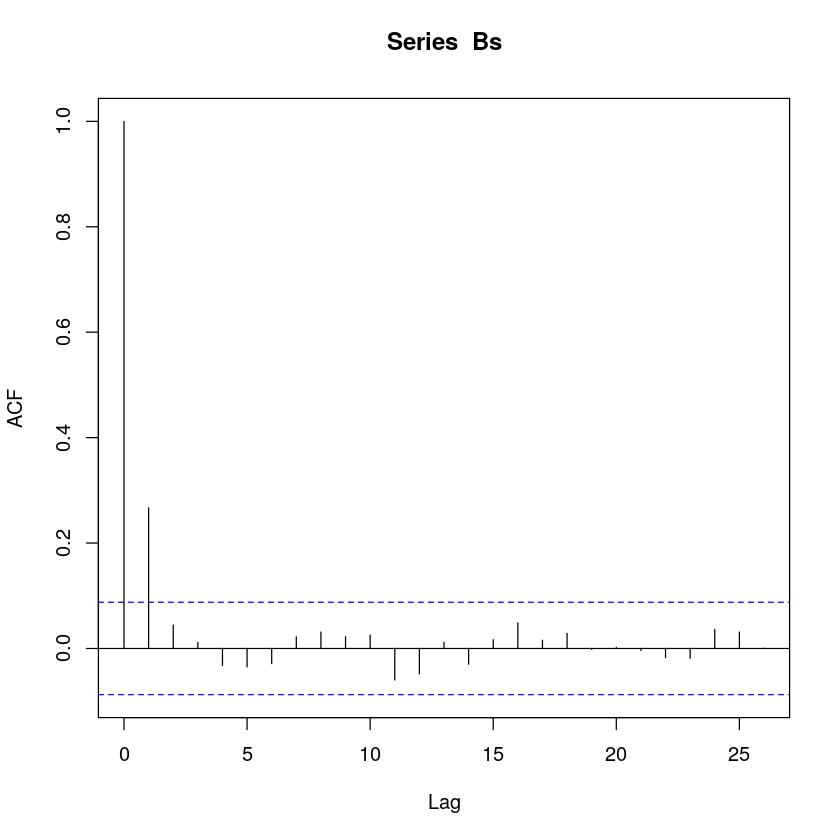

In [18]:
# Plot autocorrelation
plot_autocorr <- function(samples, burn_in=0, thinning=0){
    
    samples <- burn_thin(samples, burn_in=burn_in, thin=thinning)
    
    # Assign samples to As and Bs
    As <- samples[1,]
    Bs <- samples[2,]
    
    # Use coda to calculate ACF of As and Bs
    Aac = acf(As)$acf
    Bac = acf(Bs)$acf
}

plot_autocorr(gb$samples, burn_in=0, thinning=0.9)

The choice for number of burn-in iterations typically depends on your starting distance from centre of the distribution. As I have started at the expectation values produced in Q8, I have set the default burn-in values to 0 as the chain should start at the centre. Setting the start point arbitrarily to (0.9, 0.9), a burn-in value of around 18 should be chosen based on eye-balling the traces of the samples plotted above. A thinning factor of around 0.8 to 0.9 leaves the same size greater than the effective sample size but also signicantly reduces the ACF for smaller lags.

# Question 10

Write R code to make scatter and density plots of the samples from the previous question, and make the plots. [4]

Compare the results with the plots in question 8. [1] 

## Answer 

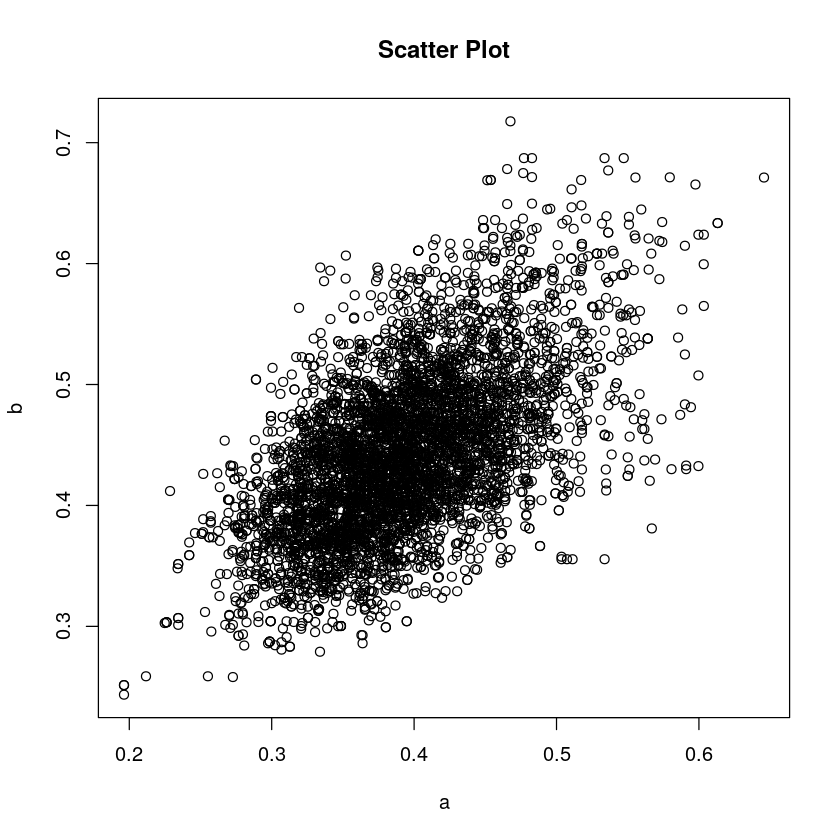

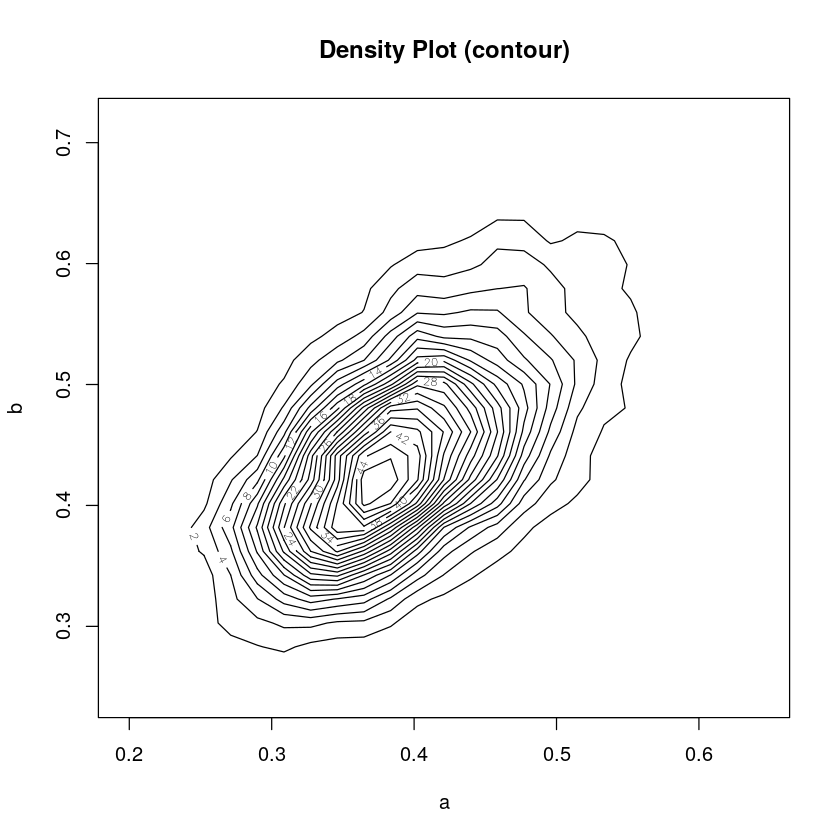

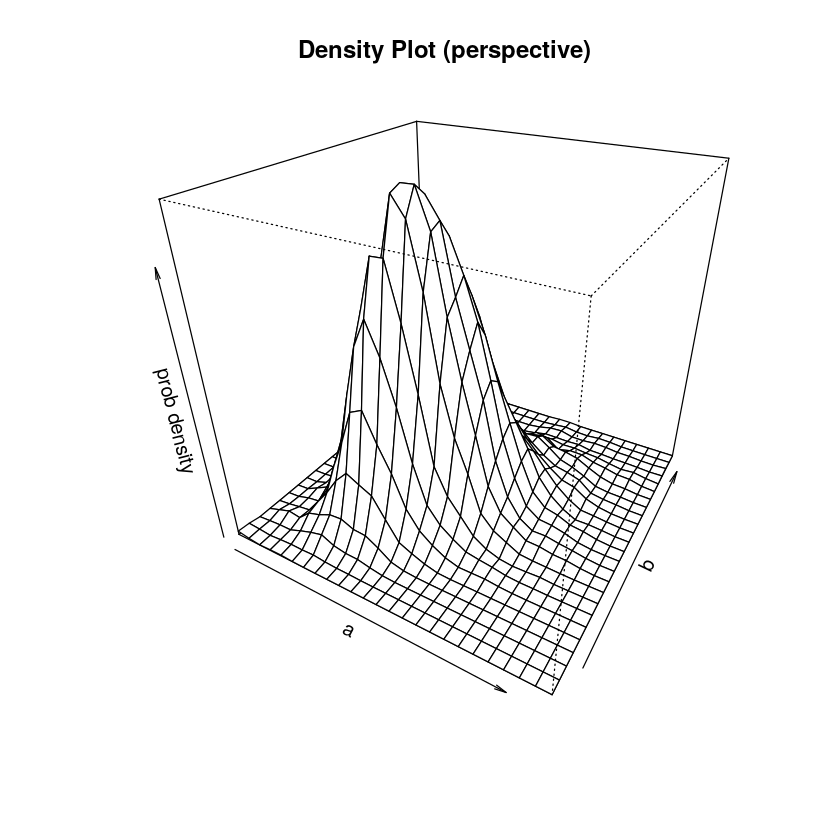

In [19]:
scat_dens <- function(samples, burn_in=0, thinning=0){
    
    samples <- burn_thin(samples, burn_in=burn_in, thin=thinning)
    As <- samples[1,]
    Bs <- samples[2,]
    prob_dens <- kde2d(As, Bs)  # Use kde2d to estimate prob dens as too computationally intensive for 5000x5000
                                # grid of a x b analytically.
    plot(As, Bs,
         main = "Scatter Plot",
         xlab = "a", ylab = "b"
        )
    
    contour(prob_dens,
            xlab = "a", ylab = "b", main = "Density Plot (contour)",
            nlevels=20
           )
    
    persp(prob_dens,
          theta=30, phi=30,
          xlab = "a", ylab = "b", zlab = "prob density", main = "Density Plot (perspective)"
         )
}

scat_dens(gb$samples)

The plots in question 8 are consistent with the results from Gibbs sampling:<br> 
- The values of a and b are close to those predicted in question 8
- The contour plot shows a similar distribution, though the results of Gibbs sampling is more defined as question 8 was based on assumptions
- The scatter plot is consistent with the contour plot as we see a high density of points within the centre contour, with the density of points decreasing as you move outwards.
- The probability density perspective plot peaks at the predicted values of a and b

> Consider the histogram of $\{\hat{\theta}_{i}\}$ from Question 3 and the contour and scatter plots of $P(a, b \mid y, n)$ from questions 8 and 10.

# Question 11

Why are the high probability values of $(a, b)$ where they are? [2] Use a plot or plots to support your argument. [2]

What does the form of these results suggest about the labs that generated the data? [4]

Suggest an alternative modelling strategy that might be more suited to this data. [4]

## Answer 

The high probability values of $a$ and $b$ seen in Qs 8 and 10 represent the MLE of $\theta$ most accurately, as seen in the plot below. These values of $a$ and $b$ produce a beta distribution which follows the distribution of $\hat \theta$ the most closely. The red line is the plot with the values of a and b deduced in Q8, the blue line is the plot with the values of a and b deduced through Gibbs sampling in Q10. Clearly both give a very similar beta distribution which describes the MLE of $\theta$ with as great probability as possible.

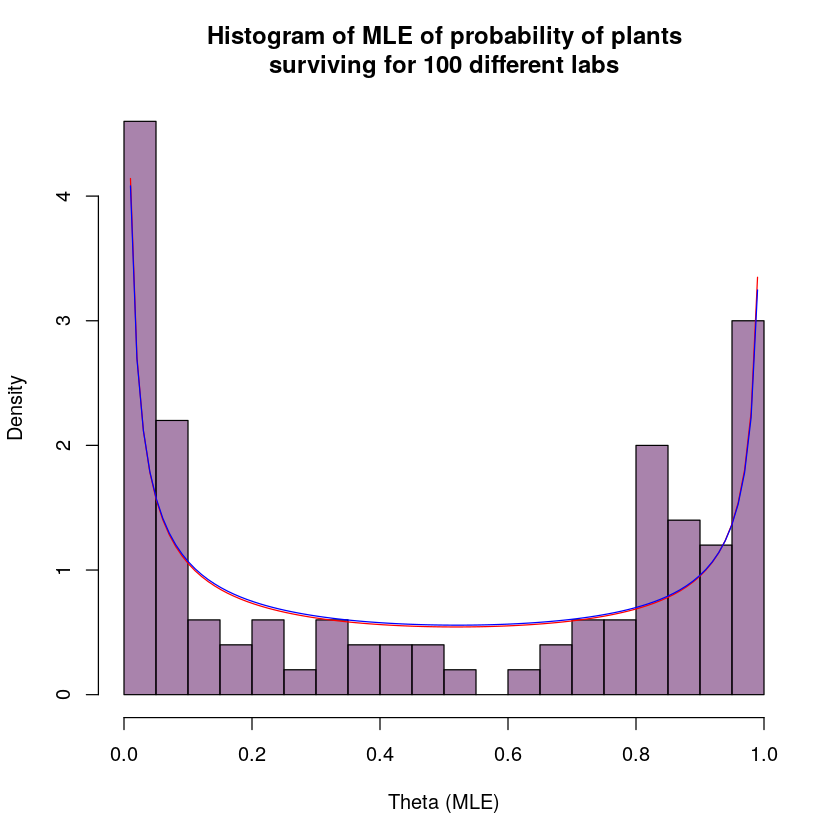

In [20]:
hist(
    thetas,
    breaks = 15,
    xlab = "Theta (MLE)",
    main = "Histogram of MLE of probability of plants\nsurviving for 100 different labs",
    col = durham_purple,
    prob = TRUE
)

p = seq(0,1, length=100)

lines(
    p,
    dbeta(p, E_a, E_b),
    col="red"
)

lines(
    p,
    dbeta(p, as.double(results[,2][1]), as.double(results[,2][2])),
    col="blue"
)


The form of these results suggests that there are loosely two types of lab, one where the plants are more likely to survive and one where they are less likely to survive.

A clustering strategy may model this data better as we can see in the plot above that $\hat \theta$ has a greater density as you go to zero or one, indicating two types of labs as discussed above.